## Outline 
<ul> <li><a href="#T1">Univariate </a></li>
    <ul>
    <li><a href="#p1">Bar chart </a></li>
    <li><a href="#p2">Pie chart</a></li>
    <li><a href="#p3">Histogram</a></li>
    <li><a href="#p4">Axes and plots</a></li>
    <li><a href="#p5">Scales and Transformation</a></li>
    </ul>
     <li><a href="#T2">Bivariate </a></li>
    <ul>
     <li><a href="#tp1"> Scatter Plot (correlation)</a></li>
    <li><a href="#tp2">Overlapping issue</a></li>
    <li><a href="#tp3">Heat Maps</a></li>
    <li><a href="#tp4">Violin and Box plots</a></li>
     </ul>
    <li><a href="#T3">Multivariate </a></li>
    <ul>
     <li><a href="#pp1">B </a></li>
    <li><a href="#pp1"></a></li>
    <li><a href="#pp1">H</a></li>
    <li><a href="#pp1">A</a></li>
     </ul>
</ul>

In [230]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# solution script imports
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2, scales_solution_1,scales_solution_2

In [346]:
pokemon = pd.read_csv('./data/pokemon.csv')
fuel = pd.read_csv('./data/fuel_econ.csv')

****
<a id='T1'></a>
# Univariate 


<a id='p1'></a>

## Bar chart 

In this workspace, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

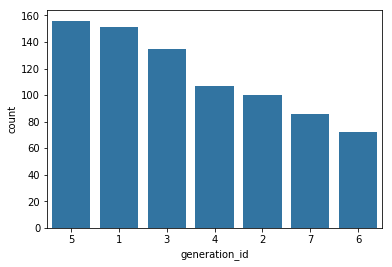

In [8]:
# YOUR CODE HERE
sns.countplot(data = pokemon, x = 'generation_id',\
              color = sns.color_palette()[0],
              order = pokemon.generation_id.value_counts().index);  

Once you've created your chart, run the cell below to check the output from our solution. Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [12]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [15]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

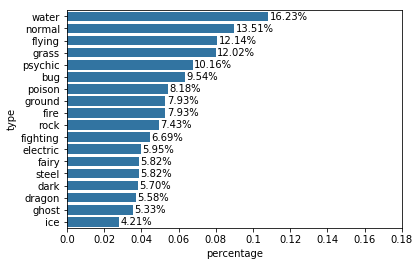

In [123]:
# ---------Relative frequencies 
sns.countplot(# basic data 
                   data = pkmn_types, y = 'type',
              # color choosing 
                   color = sns.color_palette()[0], 
              # order by count 
                   order = pkmn_types.type.value_counts().index
              )

# change the x tick unit of measure to percentage 
# + 0.02 for additional unit space in case hit the limit 
plt.xticks(
    # location
    np.arange(0, pkmn_types.type.value_counts().max()/pokemon.shape[0] +0.02, 0.02)\
            * pkmn_types.shape[0], 
    # name
    np.arange(0,pkmn_types.type.value_counts().max()/pokemon.shape[0] +0.02, 0.02))


# Add annotations for each bar 
for i in range(pkmn_types.type.value_counts().shape[0]):
    count = pkmn_types.type.value_counts()[i]
    plt.text(# 1. x position
             count +1, 
             # 2. y position
             i, 
             # 3. string to be printed
             '{:.2f}%'.format(pkmn_types.type.value_counts()[i]*100/pokemon.shape[0] ), 
             # 4. extra: va to show text location
             va= 'center')

plt.xlabel('percentage');

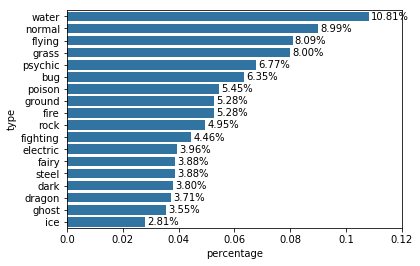

In [122]:
# ---------Absolute frequencies 
sns.countplot(# basic data 
                   data = pkmn_types, y = 'type',
              # color choosing 
                   color = sns.color_palette()[0], 
              # order by count 
                   order = pkmn_types.type.value_counts().index)

# change the x tick unit of measure to percentage 
# + 0.02 for additional unit space in case hit the limit 
plt.xticks(
    # location
    np.arange(0, pkmn_types.type.value_counts().max()/pkmn_types.type.value_counts().sum()+0.02, 0.02)\
            *pkmn_types.type.value_counts().sum() , 
    # name
    np.arange(0,pkmn_types.type.value_counts().max()/pkmn_types.type.value_counts().sum() +0.02, 0.02))

# Add annotations for each bar 
for i in range(pkmn_types.type.value_counts().shape[0]):
    count = pkmn_types.type.value_counts()[i]
    plt.text(# 1. x position
             count +1, 
             # 2. y position
             i, 
             # 3. string to be printed
             '{:.2f}%'.format(pkmn_types.type.value_counts()[i]*100/pkmn_types.type.value_counts().sum()  ), 
             # 4. extra: va to show text location
             va= 'center')

plt.xlabel('percentage');

****

<a id='p2'></a>

## Pie chart 

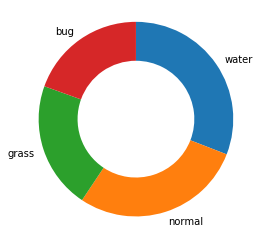

In [144]:
sorted_counts = pokemon.type_1.value_counts()[:4]
plt.pie(sorted_counts, 
        labels = sorted_counts.index, 
        startangle = 90,
        counterclock = False, 
        wedgeprops = {'width' : 0.4})
  
plt.axis('square');

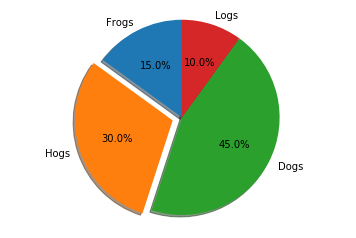

In [145]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

****

<a id='p3'></a>

## Histogram
Task: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a histogram that depicts the distribution of 'special-defense' values taken. Hint: Try playing around with different bin width sizes to see what best depicts the data.

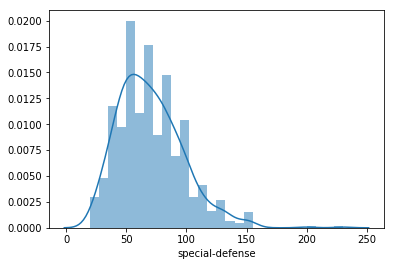

In [162]:
sb.distplot(pokemon['special-defense'], kde = True,
            hist_kws = {'alpha' : 0.5});

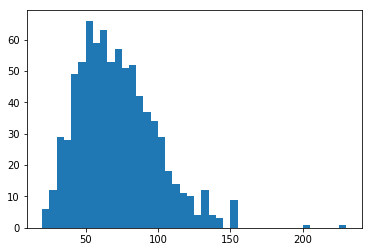

In [155]:
plt.hist(data = pokemon, x = 'special-defense', bins = bins);

****

<a id='p4'></a>

## Axes, figure and subplots

Python plot hierarchy:   
 1.  create Figure object   
 2.  add axes object inside figure object  
 3.  draw plot within axes

so we can try to simulate the process:

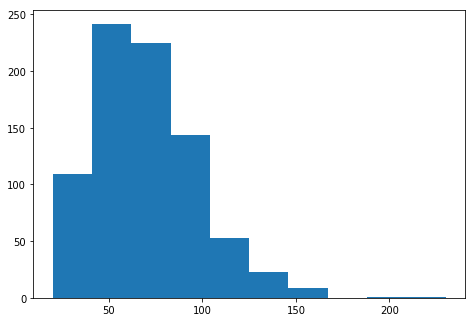

In [181]:
fig = plt.figure()
# first two elements of the list indicate the position of lower-left hand corner, 
# the last two specifying the axes width and height
ax = fig.add_axes([0.25, 0.25, 1, 1])
ax.hist(data = pokemon, x ='special-defense');

**Subplot**

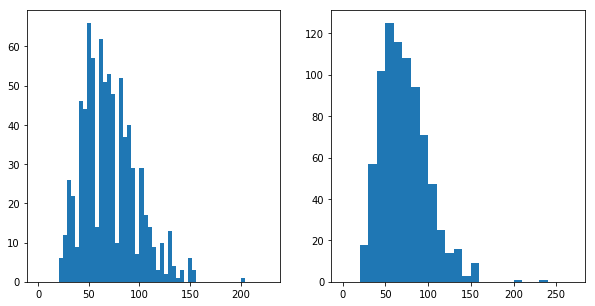

In [214]:
plt.figure(figsize = [10, 5])

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['special-defense'].max(), 4 )
plt.hist(data = pokemon, x ='special-defense', bins = bin_edges)

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['special-defense'].max()+50, 10)
plt.hist(data = pokemon, x ='special-defense', bins = bin_edges);


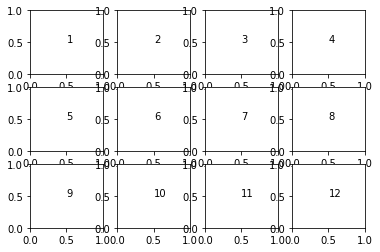

In [215]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

****

<a id='p5'></a>

## Scales and Transformation

**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

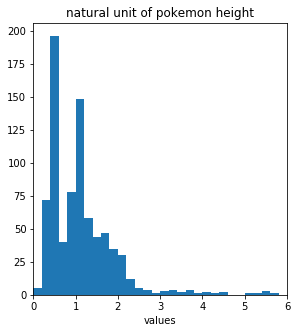

In [237]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon.height.max()+0.2, 0.2)
plt.hist(pokemon.height, bins = bin_edges)
plt.xlabel('values')
plt.title('natural unit of pokemon height')
plt.xlim((0,6));


**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

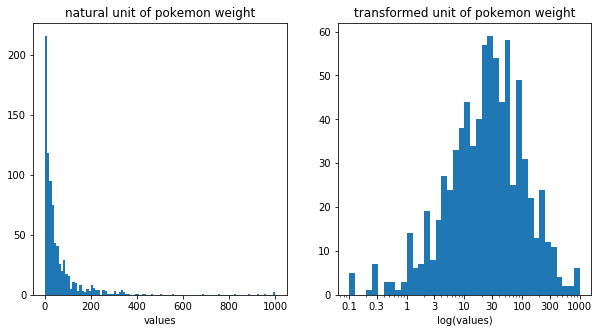

In [254]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon.weight.max()+10, 10)
plt.hist(pokemon.weight, bins = bin_edges)
plt.xlabel('values')
plt.title('natural unit of pokemon weight');


# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)

bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(pokemon.weight, bins = bins) # direct data transform
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('log(values)')
plt.title('transformed unit of pokemon weight');

****

<a id='T2'></a>

# Bivariate
<a id='tp1'></a>

## Scatter plot
**Correlation**

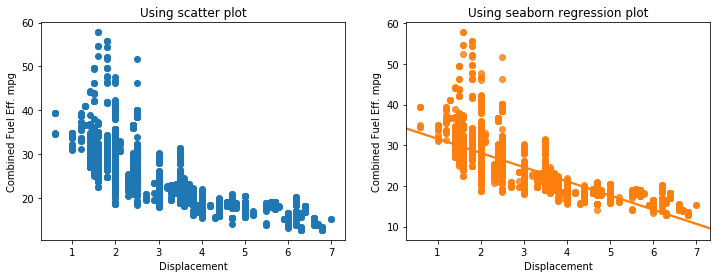

In [284]:
plt.figure(figsize = [12, 4])

# left: correlation 
plt.subplot(1, 2, 1)

plt.scatter(data = fuel, x= 'displ', y= 'comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. mpg')
plt.title('Using scatter plot')

# right: seaborn regression correlation 
plt.subplot(1, 2, 2)

sns.regplot(data = fuel, x= 'displ', y= 'comb', color = sns.color_palette()[1])
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. mpg')
plt.title('Using seaborn regression plot');

<a id='tp2'></a>

## Overplotting issue
Method :  
1. Sampling   
2. Transparency  
3. Jitter

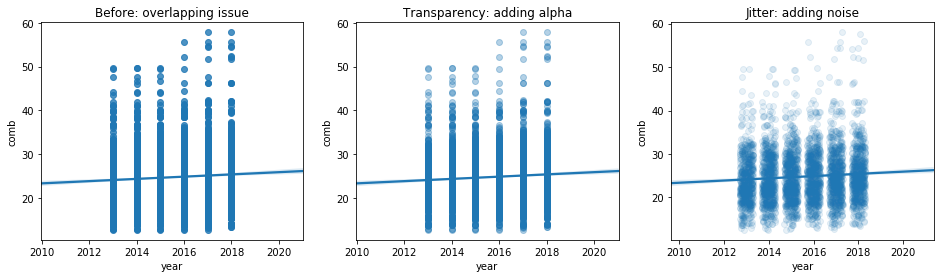

In [294]:
plt.figure(figsize = [16, 4])

# Before: Overlapped origion 
plt.subplot(1, 3, 1)
sb.regplot(data = fuel, x = 'year', y = 'comb', alpha =1 )
plt.title('Before: overlapping issue')


# After: Fixed Overlapped origion via Transparency 
plt.subplot(1, 3, 2)
sb.regplot(data = fuel, x = 'year', y = 'comb', scatter_kws = {'alpha' : 1/3})
plt.title('Transparency: adding alpha')


# After: Fixed Overlapped origion via Jitter 
plt.subplot(1, 3, 3)
sb.regplot(data = fuel, x = 'year', y = 'comb', \
           x_jitter =0.3, y_jitter = 0.3, \
         scatter_kws = {'alpha' : 1/10})
plt.title('Jitter: adding noise');

<a id='tp3'></a>

## Heat Maps
- 2d historgram 
- Bin size are import! 

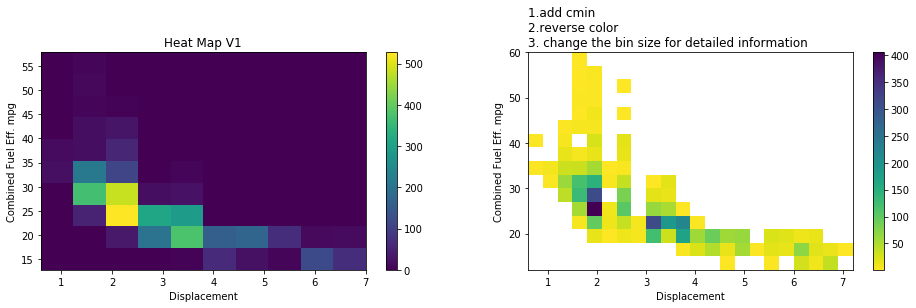

In [316]:
plt.figure(figsize =[16,4])

plt.subplot(1, 2, 1)
plt.hist2d(data = fuel, x= 'displ', y= 'comb')
# Add the legend associating the counts to colors is placed adjacent to the right of the plot 
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. mpg')
plt.title('Heat Map V1')

bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel, x= 'displ', y= 'comb', 
       # Add cmin so any bin with no counts will return as not a number will not get colored    
          cmin = 0.5,
       # Add cmap color with `_r` which means reversed color map
          cmap = 'viridis_r',
       # Add bins 
          bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. mpg')
plt.title('1.add cmin\n2.reverse color\n3. change the bin size for detailed information', loc ='left');

<a id='tp4'></a>

## [Violin](https://www.youtube.com/watch?time_continue=86&v=f8Kh4PByiEA&feature=emb_logo) plots and Box plots 

### Violin Plots
- For quantitative vs Qualitative variable 

In [347]:
ordinal_class= ['Minicompact Cars', 'Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']

In [348]:
vclasses = pd.api.types.CategoricalDtype(ordered= True, categories = ordinal_class)

In [349]:
fuel['VClass'] = fule['VClass'].astype(vclasses)

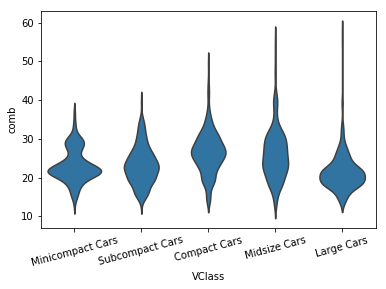

In [351]:
base_color = sns.color_palette()[0]
sns.violinplot(data= fuel, x ='VClass', y='comb', color= base_color,\
               # to hide the box plot inside of the violin plots 
               inner = None)
plt.xticks(rotation =15);

**Interpretation:**  
For each of the vehicle classes, an area is plotted that shows the approximate density of efficiency values for each vehicle class. They're like density curves turned on their sides.  
From this plot, we can see that there isnt a monotonic relationship between car size and fuel efficiency. 
The largest cars seem to have lowest fuel efficiencies,but the long tail sugguest outliers with highest of efficiencies.  
Minicompact and Subcompact cars have the next best efficiencies but the distribution for Minicompact cars is much more peaked. 
Finally, compact and midsize cars have the best efficiencies but the distribution of the Midsize cars is broder than the compact. 

### Box plots

****

<a id='T3'></a>

# Multivariate